<a href="https://colab.research.google.com/github/cmessoftware/Diplomatura_DS_GrupoM/blob/main/1er_Prueba_Diplomatura_CDyAA_Proyecyo_Final_Grupo_M_Cuaderno(COLAB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final**

**Grupo M:**
Lucia Cortes,
María Fernanda Farias,
Favio Ruggieri,
Alejandro Gomez,
Sergio Salanitri,
Karina Calvo

# Análisis Exploratorio de Datos

In [ ]:
# Intalación de librerias
!pip install missingno

In [ ]:
# Intalación de librerias
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Cargar dataset
df=pd.read_csv("/content/sneep-unificado-procesado-completo-sin-descripcion-recodificado.csv", sep=',', low_memory=False)

In [ ]:
# 2. Info del dataset
df.shape

(1436508, 51)

In [ ]:
df.head()

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2002,20,150,26,1,2,2,3,2,1,...,1,1,1,False,1,1,4,NaN,82,82.0
1,2002,20,150,25,1,2,0,2,2,1,...,1,1,1,False,1,1,4,NaN,82,82.0
2,2002,20,150,46,1,2,2,2,2,1,...,1,1,1,False,1,1,4,NaN,82,82.0
3,2002,20,150,24,1,2,0,2,3,3,...,1,1,1,False,1,1,4,NaN,82,82.0
4,2002,24,89,25,1,2,0,2,0,0,...,3,0,0,NaN,0,0,0,NaN,2,6.0


In [ ]:
df.tail()

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
1436503,2002,6,16,36,2,2,2,3,3,1,...,1,1,1,True,1,1,4,False,26,26.0
1436504,2002,6,16,45,1,2,2,3,1,1,...,1,0,0,NaN,0,0,0,NaN,26,26.0
1436505,2002,6,16,22,1,2,0,2,3,3,...,1,0,0,NaN,0,0,0,NaN,26,26.0
1436506,2002,12,174,47,1,2,2,3,0,1,...,1,0,0,NaN,0,0,0,NaN,50,50.0
1436507,2002,12,174,31,1,2,0,2,0,1,...,1,0,0,NaN,0,0,4,NaN,50,50.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436508 entries, 0 to 1436507
Data columns (total 51 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1436508 non-null  int64  
 1   provincia_sneep_id                         1436508 non-null  int64  
 2   establecimiento_id                         1436508 non-null  int64  
 3   edad                                       1436508 non-null  int64  
 4   genero_id                                  1436508 non-null  int64  
 5   nacionalidad_id                            1436508 non-null  int64  
 6   estado_civil_id                            1436508 non-null  int64  
 7   nivel_instruccion_id                       1436508 non-null  int64  
 8   ultima_situacion_laboral_id                1436508 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1436508 non-null  int64  

In [ ]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in censo_anio: 21
Number of unique values in provincia_sneep_id: 24
Number of unique values in establecimiento_id: 430
Number of unique values in edad: 85
Number of unique values in genero_id: 5
Number of unique values in nacionalidad_id: 2
Number of unique values in estado_civil_id: 3
Number of unique values in nivel_instruccion_id: 7
Number of unique values in ultima_situacion_laboral_id: 4
Number of unique values in capacitacion_laboral_al_ingresar_id: 4
Number of unique values in ultimo_lugar_residencia_id: 3
Number of unique values in ultima_provincia_residencia_sneep_id: 25
Number of unique values in jurisdiccion_id: 27
Number of unique values in situacion_legal_id: 5
Number of unique values in fecha_detencion: 11866
Number of unique values in fecha_condenado: 13398
Number of unique values in establecimiento_procedencia_id: 5
Number of unique values in delito1_id: 32
Number of unique values in delito2_id: 31
Number of unique values in delito3_id: 31
Number

In [ ]:
# Eliminacion de Categorías no relevantes al problema de estudio
# Create a copy of the DataFrame
df_modified = df.copy()

# List of columns to drop
columns_to_drop = [
    'establecimiento_id',
    'ultimo_lugar_residencia_id',
    'ultima_provincia_residencia_sneep_id',
    'jurisdiccion_id',
    'fecha_detencion',
    'fecha_condenado',
    'establecimiento_procedencia_id',
    'sancion_aplicada_id',
    'duracion_condena_meses',
    'duracion_condena_rango',
    'reparticion_id',
    'mujer_tiene_hijos_intramuro',
    'provincia_id',
    'ultima_provincia_residencia_id'
]

# Drop the specified columns
df_modified = df_modified.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the modified DataFrame
display(df_modified.head())

# Display the information of the modified DataFrame to check for dropped columns
display(df_modified.info())

,censo_anio,provincia_sneep_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,situacion_legal_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,20,26,1,2,2,3,2,1,1,...,0,1.0,1,2,1,1,False,1,1,4
1,2002,20,25,1,2,0,2,2,1,1,...,5,0.0,1,2,1,1,False,1,1,4
2,2002,20,46,1,2,2,2,2,1,1,...,10,0.0,1,2,1,1,False,1,1,4
3,2002,20,24,1,2,0,2,3,3,1,...,5,0.0,1,2,1,1,False,1,1,4
4,2002,24,25,1,2,0,2,0,0,2,...,0,NaN,0,0,0,0,NaN,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436508 entries, 0 to 1436507
Data columns (total 37 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1436508 non-null  int64  
 1   provincia_sneep_id                         1436508 non-null  int64  
 2   edad                                       1436508 non-null  int64  
 3   genero_id                                  1436508 non-null  int64  
 4   nacionalidad_id                            1436508 non-null  int64  
 5   estado_civil_id                            1436508 non-null  int64  
 6   nivel_instruccion_id                       1436508 non-null  int64  
 7   ultima_situacion_laboral_id                1436508 non-null  int64  
 8   capacitacion_laboral_al_ingresar_id        1436508 non-null  int64  
 9   situacion_legal_id                         1436508 non-null  int64  

None

In [ ]:
df_modified.head()


,censo_anio,provincia_sneep_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,situacion_legal_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,20,26,1,2,2,3,2,1,1,...,0,1.0,1,2,1,1,False,1,1,4
1,2002,20,25,1,2,0,2,2,1,1,...,5,0.0,1,2,1,1,False,1,1,4
2,2002,20,46,1,2,2,2,2,1,1,...,10,0.0,1,2,1,1,False,1,1,4
3,2002,20,24,1,2,0,2,3,3,1,...,5,0.0,1,2,1,1,False,1,1,4
4,2002,24,25,1,2,0,2,0,0,2,...,0,NaN,0,0,0,0,NaN,0,0,0


In [ ]:
# 4. Limpieza de datos
df_modified.isnull().sum()


,0
censo_anio,0
provincia_sneep_id,0
edad,0
genero_id,0
nacionalidad_id,0
estado_civil_id,0
nivel_instruccion_id,0
ultima_situacion_laboral_id,0
capacitacion_laboral_al_ingresar_id,0
situacion_legal_id,0


In [ ]:
# Remove duplicate rows and update df_modified
initial_rows = df_modified.shape[0]
df_modified.drop_duplicates(inplace=True)
rows_after_dropping = df_modified.shape[0]
num_duplicates_dropped = initial_rows - rows_after_dropping

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows dropped: {num_duplicates_dropped}")

display(df_modified.head())
display(df_modified.info())

Initial number of rows: 1436508
Number of rows after dropping duplicates: 1368902
Number of duplicate rows dropped: 67606


,censo_anio,provincia_sneep_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,situacion_legal_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,20,26,1,2,2,3,2,1,1,...,0,1.0,1,2,1,1,False,1,1,4
1,2002,20,25,1,2,0,2,2,1,1,...,5,0.0,1,2,1,1,False,1,1,4
2,2002,20,46,1,2,2,2,2,1,1,...,10,0.0,1,2,1,1,False,1,1,4
3,2002,20,24,1,2,0,2,3,3,1,...,5,0.0,1,2,1,1,False,1,1,4
4,2002,24,25,1,2,0,2,0,0,2,...,0,NaN,0,0,0,0,NaN,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 1368902 entries, 0 to 1436507
Data columns (total 37 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1368902 non-null  int64  
 1   provincia_sneep_id                         1368902 non-null  int64  
 2   edad                                       1368902 non-null  int64  
 3   genero_id                                  1368902 non-null  int64  
 4   nacionalidad_id                            1368902 non-null  int64  
 5   estado_civil_id                            1368902 non-null  int64  
 6   nivel_instruccion_id                       1368902 non-null  int64  
 7   ultima_situacion_laboral_id                1368902 non-null  int64  
 8   capacitacion_laboral_al_ingresar_id        1368902 non-null  int64  
 9   situacion_legal_id                         1368902 non-null  int64  
 10 

None

In [ ]:
df_modified.shape


(1368902, 37)

Se hallaron 21302 filas duplicadas, las cuales se excluyeron del dataset, quedando un dataset de 1.368.938 filas.

In [ ]:
# Display value counts and proportions of the target variable
print("Value counts of 'participo_alteracion_orden_ult_anio_id':")
display(df_modified['participo_alteracion_orden_ult_anio_id'].value_counts())

print("\nProportions of 'participo_alteracion_orden_ult_anio_id':")
display(df_modified['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

Value counts of 'participo_alteracion_orden_ult_anio_id':


,count
participo_alteracion_orden_ult_anio_id,
1,1070988
2,178715
0,71704
3,47495



Proportions of 'participo_alteracion_orden_ult_anio_id':


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.782370
2,0.130554
0,0.052381
3,0.034696


In [ ]:
# Filter out rows where 'participo_alteracion_orden_ult_anio_id' is 0
df_filtered = df_modified[df_modified['participo_alteracion_orden_ult_anio_id'] != 0].copy()

# Display the shape of the filtered DataFrame
print("Shape of the DataFrame after removing category 0:", df_filtered.shape)

# Display the value counts of the target variable in the filtered DataFrame
print("\nValue counts of 'participo_alteracion_orden_ult_anio_id' after filtering:")
display(df_filtered['participo_alteracion_orden_ult_anio_id'].value_counts())

print("\nProportions of 'participo_alteracion_orden_ult_anio_id' after filtering:")
display(df_filtered['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

Shape of the DataFrame after removing category 0: (1297198, 37)

Value counts of 'participo_alteracion_orden_ult_anio_id' after filtering:


,count
participo_alteracion_orden_ult_anio_id,
1,1070988
2,178715
3,47495



Proportions of 'participo_alteracion_orden_ult_anio_id' after filtering:


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.825616
2,0.137770
3,0.036614


In [ ]:
# Tratamiento de valores faltantes:
# Replace null values with 0 in df_filtered
df_filtered.fillna(0, inplace=True)

# Verify that there are no more null values
print("Missing values after filling with 0:")
display(df_filtered.isnull().sum().sum())

Missing values after filling with 0:


np.int64(0)

Se reemplaza los valores faltantes por 0 porque en el dataset original los campos vacios de las categorías eran codificados como 0, las características que tienen valores faltantes no corresponden a la variable participo_alteracion_orden_ult_anio_id que es la que vamos a llamar target

In [ ]:
# Comprobación que se reemplazaron los valores faltantes por 0
df_filtered.isnull().sum()

,0
censo_anio,0
provincia_sneep_id,0
edad,0
genero_id,0
nacionalidad_id,0
estado_civil_id,0
nivel_instruccion_id,0
ultima_situacion_laboral_id,0
capacitacion_laboral_al_ingresar_id,0
situacion_legal_id,0


In [ ]:
# Download the filtered DataFrame
df_filtered.to_csv('sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv', index=False)
print("Filtered DataFrame saved as 'sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv'")

Filtered DataFrame saved as 'sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv'


In [ ]:
df_filtered.shape

(1297198, 37)

## Análisis de Correlaciones

In [ ]:
# 7. Análisis Bivariado
# Select only numeric columns for correlation matrix
df_numeric = df_modified.select_dtypes(include=np.number)

# Computar matriz de correlación
corr_matrix = df_numeric.corr()

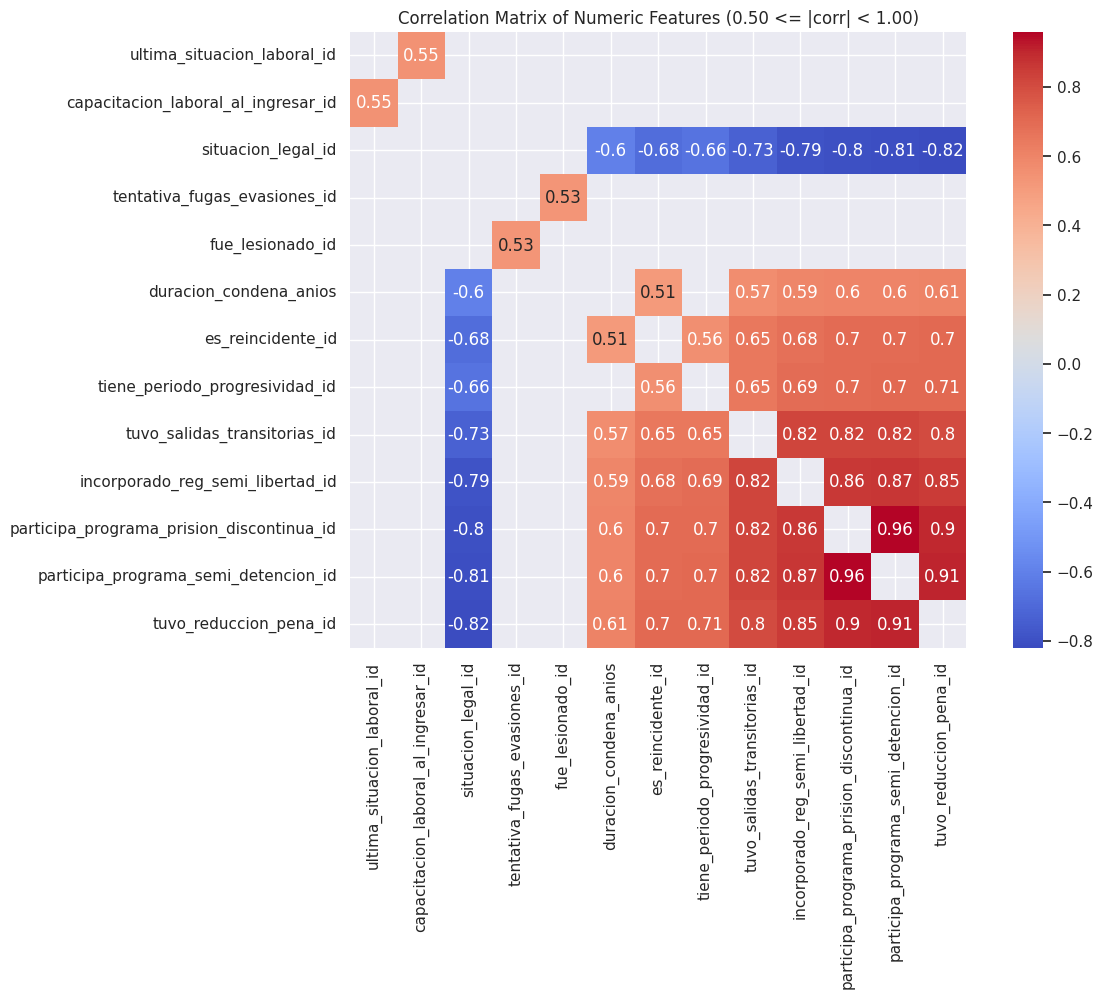

In [ ]:
# Filter the correlation matrix to show only correlations between 0.50 and 0.99
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.50) & (corr_matrix < 1.00) | (corr_matrix > -1.00) & (corr_matrix <= -0.50)]

# Remove rows and columns with all NaN values (due to filtering)
filtered_corr_matrix.dropna(axis=0, how='all', inplace=True)
filtered_corr_matrix.dropna(axis=1, how='all', inplace=True)


# Generate heatmap for filtered matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features (0.50 <= |corr| < 1.00)')
plt.show()

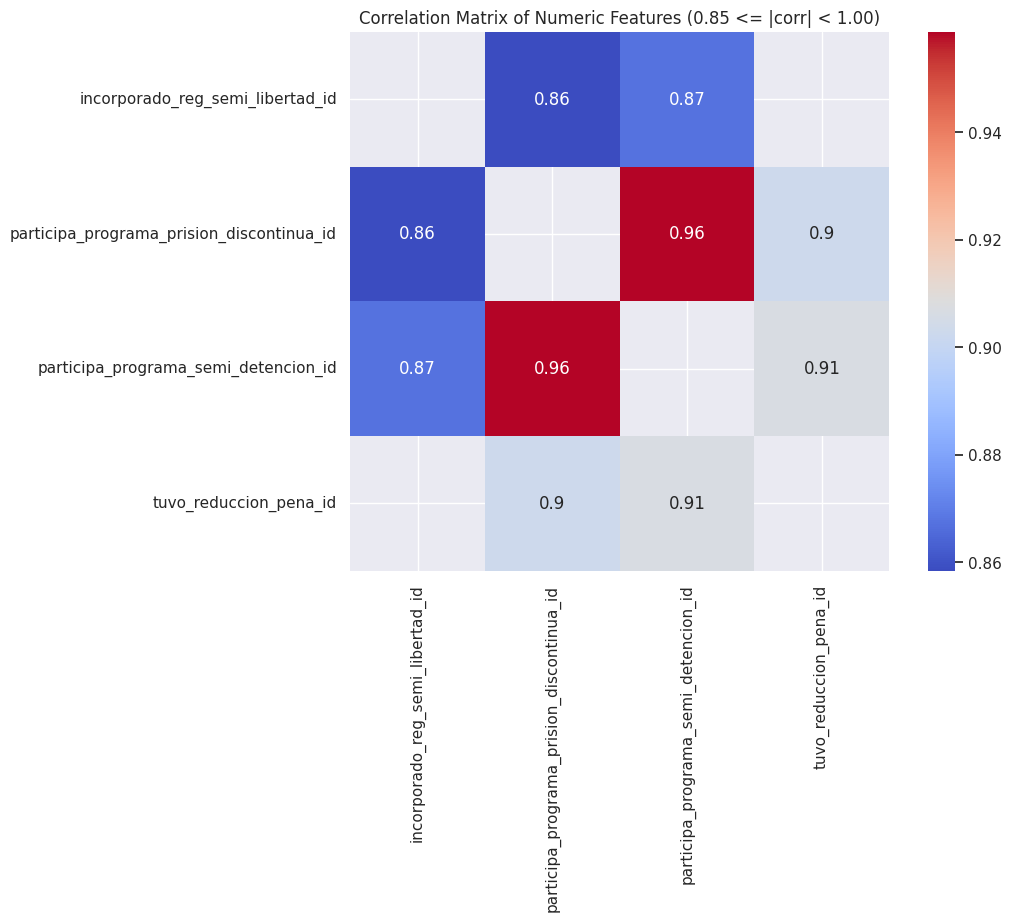

In [ ]:
# Filter the correlation matrix to show only correlations between 0.85 and 0.99
filtered_corr_matrix_high = corr_matrix[(corr_matrix >= 0.85) & (corr_matrix < 1.00) | (corr_matrix > -1.00) & (corr_matrix <= -0.85)]

# Remove rows and columns with all NaN values (due to filtering)
filtered_corr_matrix_high.dropna(axis=0, how='all', inplace=True)
filtered_corr_matrix_high.dropna(axis=1, how='all', inplace=True)


# Generate heatmap for filtered matrix
plt.figure(figsize=(10, 7))
sns.heatmap(filtered_corr_matrix_high, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features (0.85 <= |corr| < 1.00)')
plt.show()

Si bien hay varias variables con correlacion mayor a 0,85, al no pensar utilizar un modelo de regresión logistica y no tener problema de multidimencionalidad, porque se cuenta con una bases de datos grande, en un primer momento no se van a agrupar variables ni eliminar.

In [ ]:
# Display value counts and proportions of the 'genero_id' column
print("Value counts of 'genero_id':")
display(df_filtered['genero_id'].value_counts())

print("\nProportions of 'genero_id':")
display(df_filtered['genero_id'].value_counts(normalize=True))

Value counts of 'genero_id':


,count
genero_id,
1,1234261
2,61985
3,861
4,89
5,2



Proportions of 'genero_id':


,proportion
genero_id,
1,0.951482
2,0.047784
3,0.000664
4,0.000069
5,0.000002


In [ ]:
df_modified = df_filtered

# Evaluación de Modelos

In [ ]:
# LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# PARAMETROS

rnd_state = 42

# Arboles de Desición: LGBM y CatBoost

## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.267259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 908038, number of used features: 36
[LightGBM] [Info] Start training from score -0.191625
[LightGBM] [Info] Start training from score -1.982173
[LightGBM] [Info] Start training from score -3.307322
LGBM Model Performance:
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.97      0.95    321297
           2       0.72      0.66      0.69     53615
           3       0.74      0.45      0.56     14248

    accuracy                           0.91    389160
   macro avg       0.80      0.69      0.73    389160
weighted avg       0.90      0.91      0.90    389160

Confusion Matrix:
 [[311277   9337    683]
 [ 16708  353

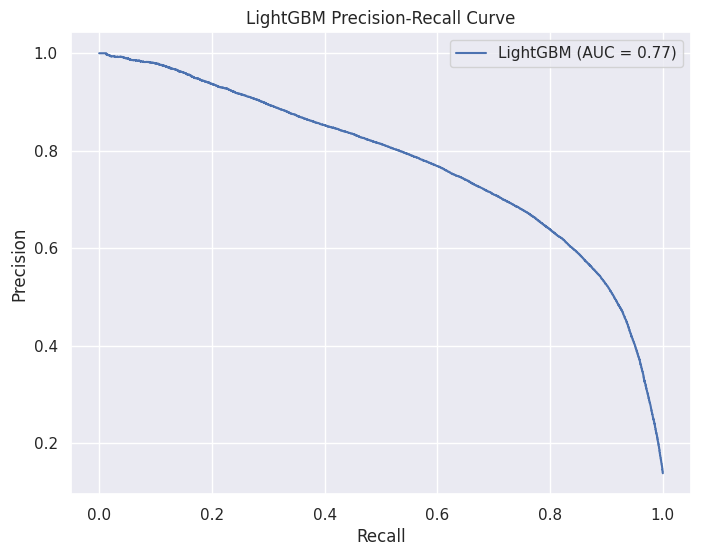

In [ ]:
# Separate features (X) and target (y)
# Exclude non-numeric and potentially problematic columns and the target variable
X = df_modified.drop(['participo_alteracion_orden_ult_anio_id'],
                     axis=1, errors='ignore')

# Set the target variable
y = df_modified['participo_alteracion_orden_ult_anio_id']

# Identify categorical features in X to encode
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets (70/30 split) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_state, stratify=y)

# Initialize and train the LGBMClassifier model
lgbm_model = LGBMClassifier(random_state=rnd_state)
lgbm_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
y_pred_lgbm = lgbm_model.predict(X_test)
report_lgbm = classification_report(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

print("LGBM Model Performance:")
print("Classification Report:\n", report_lgbm)
print("Confusion Matrix:\n", cm_lgbm)

# Plot Precision-Recall Curve
y_probs_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_probs_lgbm, pos_label=lgbm_model.classes_[1])
auc_lgbm = auc(recall_lgbm, precision_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

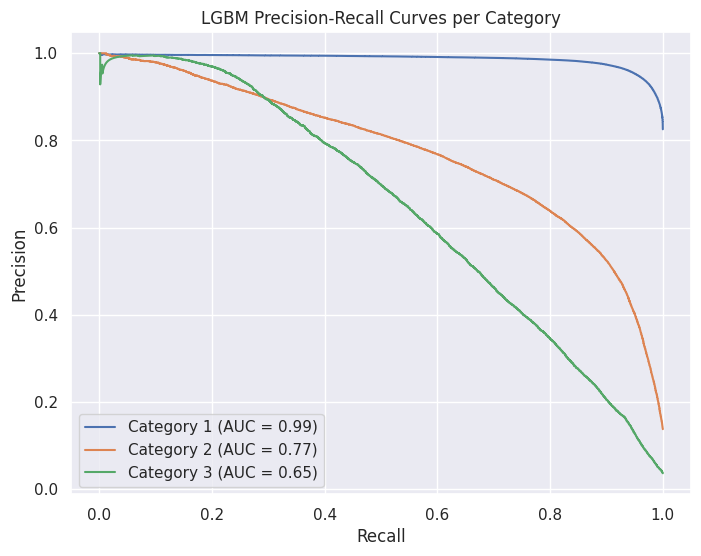

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class
y_test_bin = label_binarize(y_test, classes=lgbm_model.classes_)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from LGBM model
y_probs_lgbm = lgbm_model.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_probs_lgbm[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Category {lgbm_model.classes_[i]} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LGBM Precision-Recall Curves per Category')
plt.legend()
plt.grid(True)
plt.show()

# Modelo CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00
